In [1]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Label  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79    80+
1960   0.0   0.06    2.0   23.7   82.1  101.9  143.7  183.0  230.1
1961   0.0   0.06    1.1   20.8   85.1  109.3  148.7  193.5  212.4
1962   0.0   0.00    2.3   23.7   89.6  108.6  149.1  197.4  241.8
1963   0.0   0.06    2.1   22.3   88.0  109.2  147.8  198.0  226.8
1964   0.0   0.11    1.6   22.0   86.9  113.2  154.7  219.4  235.2
...    ...    ...    ...    ...    ...    ...    ...    ...    ...
2016   0.0   0.07    4.6   46.1  154.2  250.1  367.8  343.5  350.2
2017   0.0   0.00    6.6   44.0  149.3  255.4  369.3  360.4  367.6
2018   0.0   0.07    5.8   40.1  147.9  249.4  367.6  353.3  390.7
2019   0.0   0.26    6.6   45.9  153.0  253.6  375.4  370.1  381.2
2020   0.0   0.06    6.1   44.3  150.2  236.1  329.9  338.4  373.6

[61 rows x 9 columns]


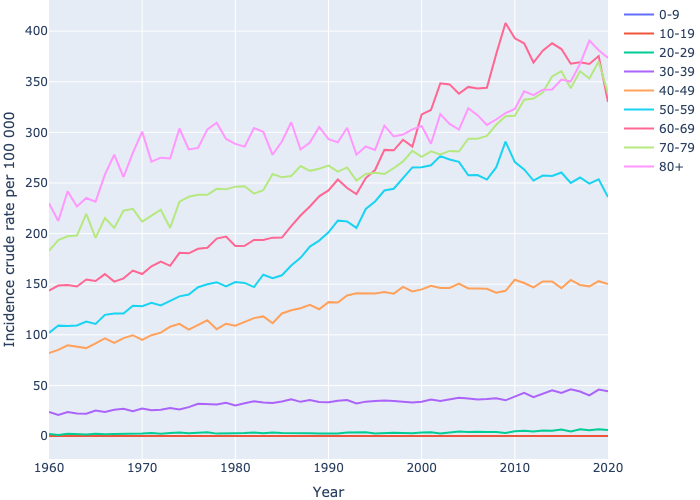

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np


# load cancer data
data = pd.read_csv("../data/NCdata-trends-total-pop(578+246+208+352+752)-can(180)-incidence-females-age(0-84)-y(1943-2020).csv", header=0, index_col=0)
data = data.T

print(data)

figures = []
for country in data.columns:
    figures.append(
        go.Scatter(
            name=country,
            x=data.index,
            y=data[country],
            mode='lines',
            showlegend=True,
        )
    )

layout = go.Layout(
    xaxis=dict(
        title="Year",
        tickmode='linear', #change 1
        tick0=data.index.min(),
        dtick=10,
        tickvals=data.index,
    ),
    yaxis=dict(title="Incidence crude rate per 100 000")
)

fig = go.Figure(figures, layout=layout)
fig.update_layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)

fig.show(renderer="png")#renderer="colab")
fig.write_image("bc_incidence_over_time_age_groups.png")
